# **Data Analysis of Amazon Fashion Sales**

This Jupyter Notebook is to analyze the sales, based on dataset `products.csv` after data cleansing.

**Objective:** Shows the data clearly to generate valuable insights about wich happened previously.

## **Step 1**: Configure Where Is Possible Import Modules

Sice it is Jupyter Notebook here, is necessary configure the path with modules to import the custom function `clean_data_amazon()`.

In [1]:
#================================================================================
# CONFIGS TO IMPORT CUSTOM MODULE
#================================================================================

# Import os to get current work directory and absolute path
import os
# Import sys to check whether project root is on list of modules and packages
import sys

# Build absolute path to project_root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Insert project root in sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

## **Step 2**: Import Libs and Load Dataset to Clean

First, imports libs to load dataset and plot graphics. After, load dataset and clear data with custom function imported.

In [2]:
#================================================================================
# IMPORTS
#================================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.data_cleaner import clean_amazon_data

#================================================================================
# DATA LOAD AND CLEANER
#================================================================================

# Load raw data
try:
    df_raw = pd.read_csv("../data/raw/products.csv", sep=",")
except FileNotFoundError:
    print("Document not found.")
    
# Clean data using function
df = clean_amazon_data(df_raw)

# Set plot style
sns.set_style(style="whitegrid")

# Shows firts 5 rows of clean dataset
df.head()

,product_id,brand,title,price,category,rating
843,B00N1997B0,GUESS,"""Basic G Logo Heart Link Bracelet, One Size, O...",49.00,New season,4.2
6989,B09C1ZH9NH,Other,"""Contemporary Kundan Collection"" Indian Bollyw...",32.29,Outlet,4.1
12338,B087Q5LS5W,Other,'ChainsHouse Stainless Steel Cuban Link Bracel...,76.98,Accessories,4.4
12936,B09GY81DSV,Other,'Dankadi Men 925 Sterling Silver Bracelet Fash...,173.06,Accessories,3.6
13142,B09JJNXNGV,Other,'H&Beautimer Punk Men Box chain Bracelet 925 S...,204.28,Accessories,4.8


## **Step 3**: Plot Graphs

Finally, just plot necessary graphs.

### **Graph 1:** Histogram

Histogram to shows distribution of prices, both without log and the with log. I use log transformation to expand the view and facilitate analysis.

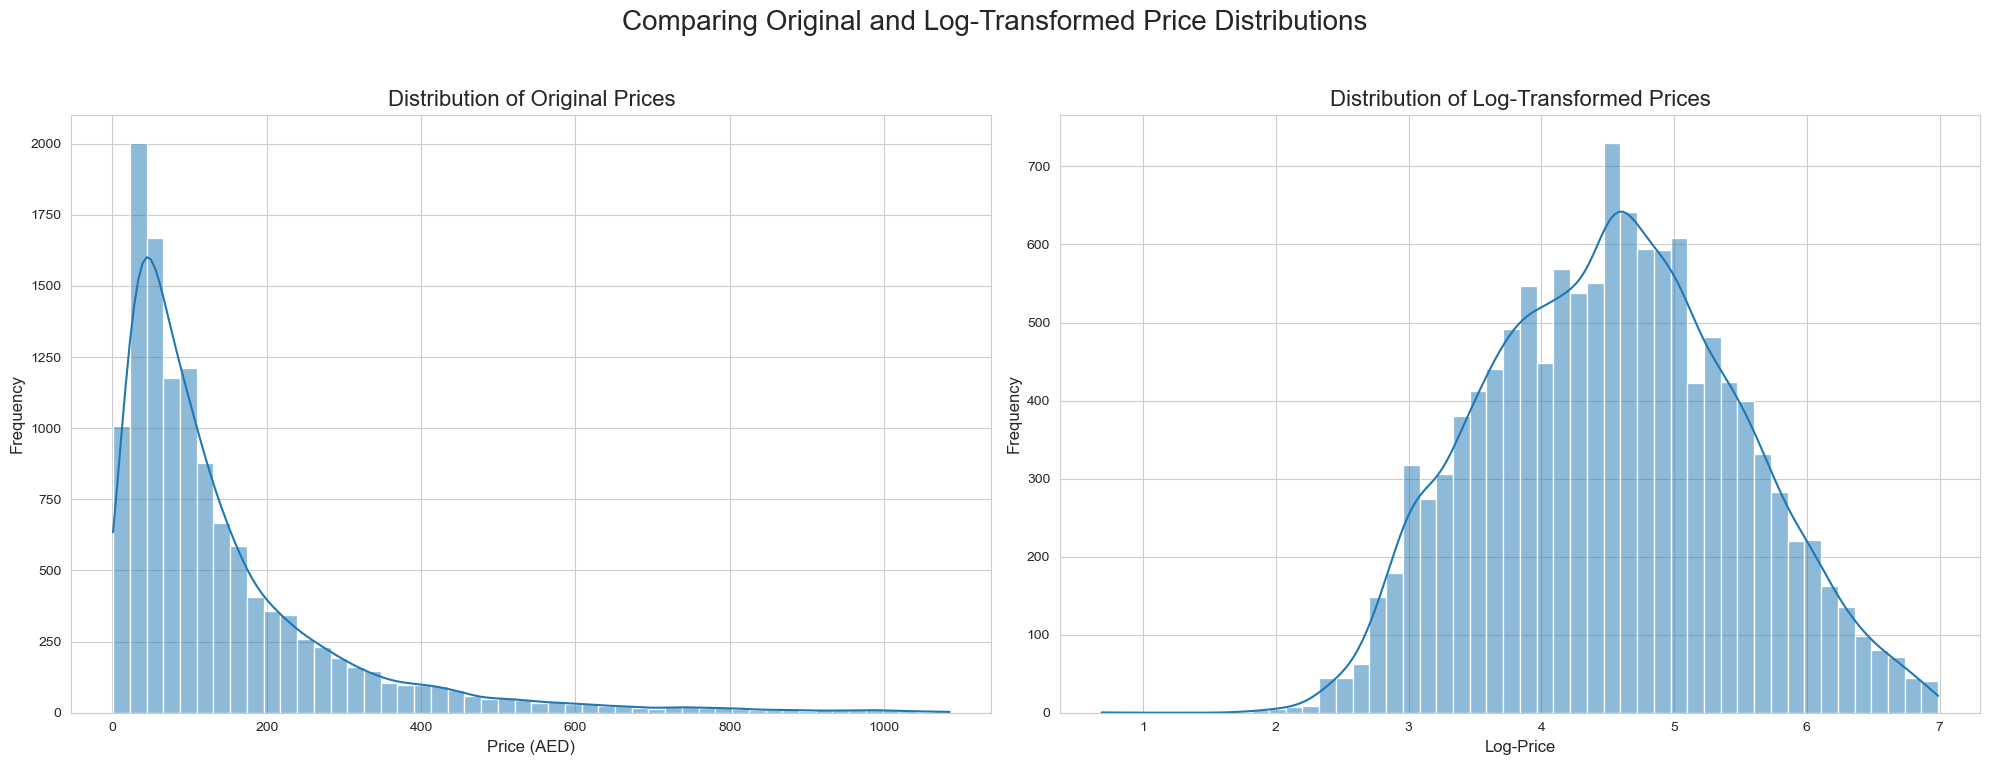

In [3]:
# Import numpy for log transformation
import numpy as np

# 99th percentile
price_cap = df["price"].quantile(0.99)

# Filter prices that are less than 99th percentile
df_plot = df[df["price"] < price_cap].copy()

# Create a new column with log price transformation
df_plot["log_price"] = np.log1p(df_plot["price"])

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the distribution of prices
sns.histplot(data=df_plot, x="price", bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Original Prices", fontsize=16)
axes[0].set_xlabel("Price (AED)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Plotting the distribution of log prices
sns.histplot(data=df_plot, x="log_price", bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Log-Transformed Prices", fontsize=16)
axes[1].set_xlabel("Log-Price", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Add a main title for the entire figure
fig.suptitle("Comparing Original and Log-Transformed Price Distributions", fontsize=20)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save generated image
plt.savefig(os.path.join(project_root, "images", "prices_distribution.png"))

plt.show()

- **Log-Transformed Concentration:** The peak in the Log-Transformed shows us what clothes are in region 4.5 are most common. Then shows that the concentration is between 3 and 6. To discover what the real values are, we use the function `np.expm1()` to return the original value transformed with `np.log1p()`.

In [4]:
# Return peak and interval values in log transformed. 
peak = np.expm1(4.5)
begin_interval, end_interval = np.expm1(3), np.expm1(6)

# Shows values
print(f"Peak: {peak} AED | Interval: {begin_interval} AED to {end_interval} AED")

Peak: 89.01713130052181 AED | Interval: 19.085536923187668 AED to 402.4287934927351 AED


- **Real Concentration:** Before, we couldn't analyze and define wich is the peak. But, with log-transformed values, this stay more easy. The sales peak is, approximately, 89.02 AED and the concentration interval is between, approximately, 19.09 AED and 402.43 AED.

#### **Conclusion**

The most common price point for products in this catalog is around AED 89. The vast majority of items are in the AED 19 to AED 402 range, suggesting that this is Amazon.ae's primary market segment for fashion.

### **Graph 2:** Density Chart

Density Chart to check if price and different category have a relation and where that's relation.

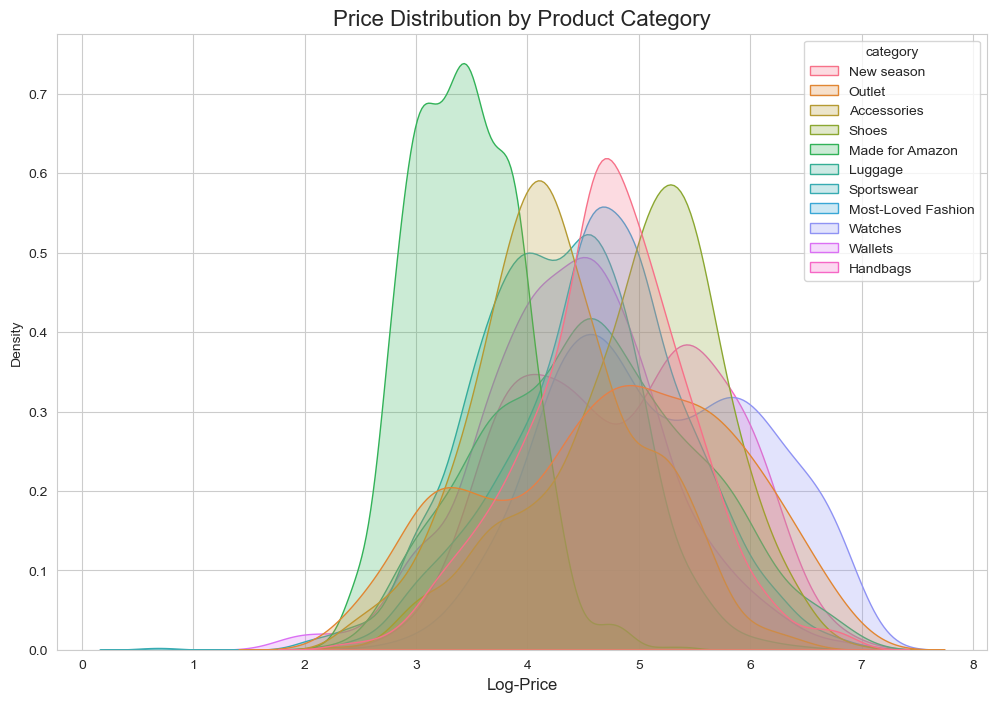

In [5]:
# Create a density plot to compare price distributions by category
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_plot, x="log_price", hue="category", fill=True, common_norm=False)
plt.title("Price Distribution by Product Category", fontsize=16)
plt.xlabel("Log-Price", fontsize=12)

# Save generated image
plt.savefig(os.path.join(project_root, "images", "price_distribution_by_category.png"))

plt.show()

#### **Conclusion**

In general, the prices are not relationated with the categories. But, the category `Made for Amazon` has a largest and highlighted density if compaired with rest, and your peak is between 3 and 4 log-transformed price (next to general price peak). That can shows us that `Made for Amazon` is in primary market segment for fashion.

### **Graph 3:** Boxplot

This chart shows us the relation between log-transformed price and rating.

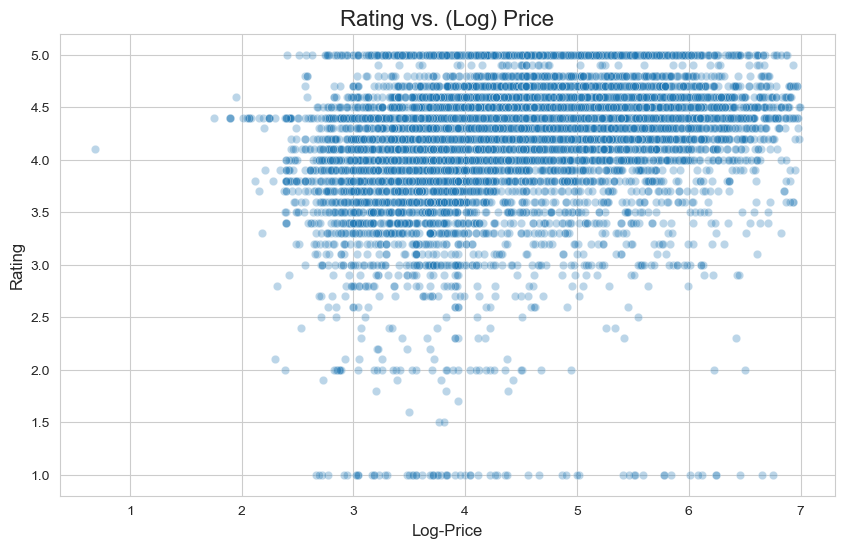

In [6]:
# Create a scatter plot to see the relationship between price and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x="log_price", y="rating", alpha=0.3)
plt.title("Rating vs. (Log) Price", fontsize=16)
plt.xlabel("Log-Price", fontsize=12)
plt.ylabel("Rating", fontsize=12)

# Save generated image
plt.savefig(os.path.join(project_root, "images", "rating_vs_log_price.png"))

plt.show()

#### **Conclusion**

Is possible to look that if price is more to right, the concentration will be high, above of 4. As you walk to the left, the concentration fall a little, shows us that price and rating are relationed. If you spend more, probably the rating will be above 4.

### **Graph 4:** Boxplot

This chart is the same seen previously, but with a change: the ratings are separated by category. That will be allow analyze better the relation between price and rating, thinking if the category influence the rating and price really have not relation.

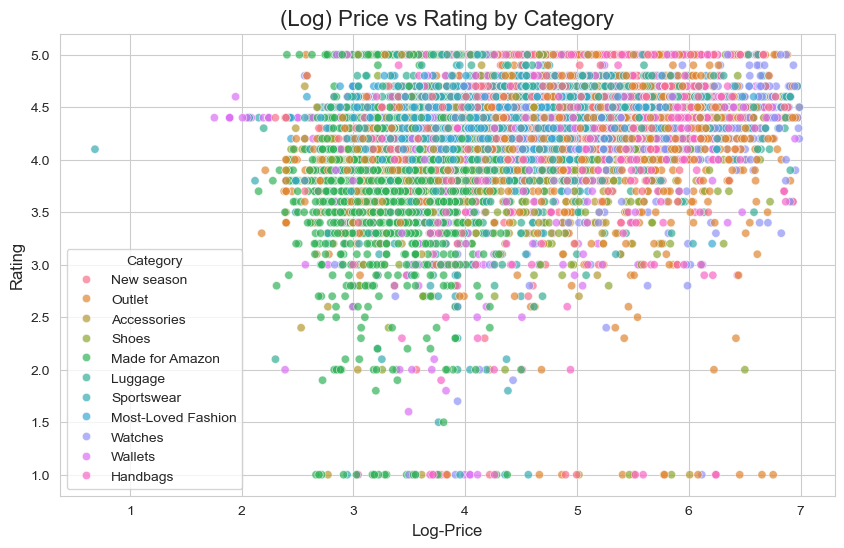

In [7]:
# Create a scatter plot to see the relationship between price and rating by category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x="log_price", y="rating", hue="category", alpha=0.7)
plt.title("(Log) Price vs Rating by Category", fontsize=16)
plt.xlabel("Log-Price", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.legend(title="Category")

# Save generated image
plt.savefig(os.path.join(project_root, "images", "log_price_vs_rating_by_category.png"))

plt.show()

- **Category and Rating:** It is possible note that have a relation between category and rating. If category is `Made for Amazon`, the tendency is the rating be medium to low, but if category is `New Season`, `Sporswear`, `Wallets` or `Handbags` probably will be almost 5.

- **Price vs Category:** How seen already previously, `Made for Amazon` has a relation with price peak. But, was difficult analyze the rest. Here, it is possible see that `Sportswear` has too a relation with price peak. The catories `Wallets` and `Handbangs`, in return, are further to the right in chart.

#### **Conclusion**

Was possible see that category and rating are relationed, while price and category may be relationed at a certain level, more than `Graph 2`, but, in general, it is inconclusive.